# Projet de Prédiction des AVC dans un Établissement de Santé

## Contexte
Un établissement de santé de premier plan a constaté une augmentation du nombre de patients diagnostiqués avec un AVC. Pour remédier à ce problème croissant, l'établissement a décidé de lancer un projet visant à prédire la probabilité qu'un patient soit victime d'un AVC en fonction de divers facteurs de santé.

## Objectif du Projet
L'objectif principal de ce projet est de créer un modèle prédictif capable de déterminer la probabilité qu'un patient soit victime d'un AVC en utilisant les antécédents médicaux et les informations démographiques des patients. Ce modèle aidera à identifier les patients à risque élevé et à proposer des mesures d'intervention et de prévention précoces.

De manière spécifique il s'agit de:

1. Explorer l’ensemble de données pour identifier les caractéristiques les plus importantes des patients et/ou les caractéristiques cliniques.
2. Construire un modèle de prédiction d’accident vasculaire cérébral bien validé pour une utilisation clinique.
3. Déployer le modèle pour améliorer la prise de décision clinique de l'organisation.

## Données Disponibles
L'établissement de santé a accès à une grande quantité de données sur les patients, incluant :
- Antécédents médicaux
- Informations démographiques

## Impact Attendu
- Réduction du nombre d'accidents vasculaires cérébraux (AVC) au sein de la population de patients.
- Positionnement de l'établissement comme un leader dans l'utilisation de l'analyse avancée et de l'apprentissage automatique pour améliorer les résultats des patients.
- Fourniture d'un outil précieux pour les prestataires de soins de santé et les patients, leur offrant un aperçu de leur risque d'AVC et des mesures qu'ils peuvent prendre pour l'éviter.

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

#data["smoking_status"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 1- Analyse Exploratoire des Données

#### 1-1 Analyse de Forme
-  **Variable cible** : stroke
-  **Nombre de ligne et de colonne**: 5110 et 11
-  **Type de variable**: qualitatives : 5 et quantitatives: 6
-  **Analyse des valeurs manquantes**: seule la variable 'Indice de masse corporelle (BMI) du patient' possede des valeurs manquantes (3.93%)



In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [169]:
df=data.copy()
df=df.drop(columns="id",axis=0)
print(df.shape)

(5110, 11)


<Axes: ylabel='count'>

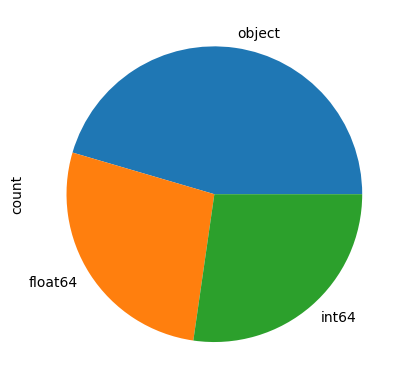

In [170]:
df.dtypes.value_counts().plot.pie()

<Axes: >

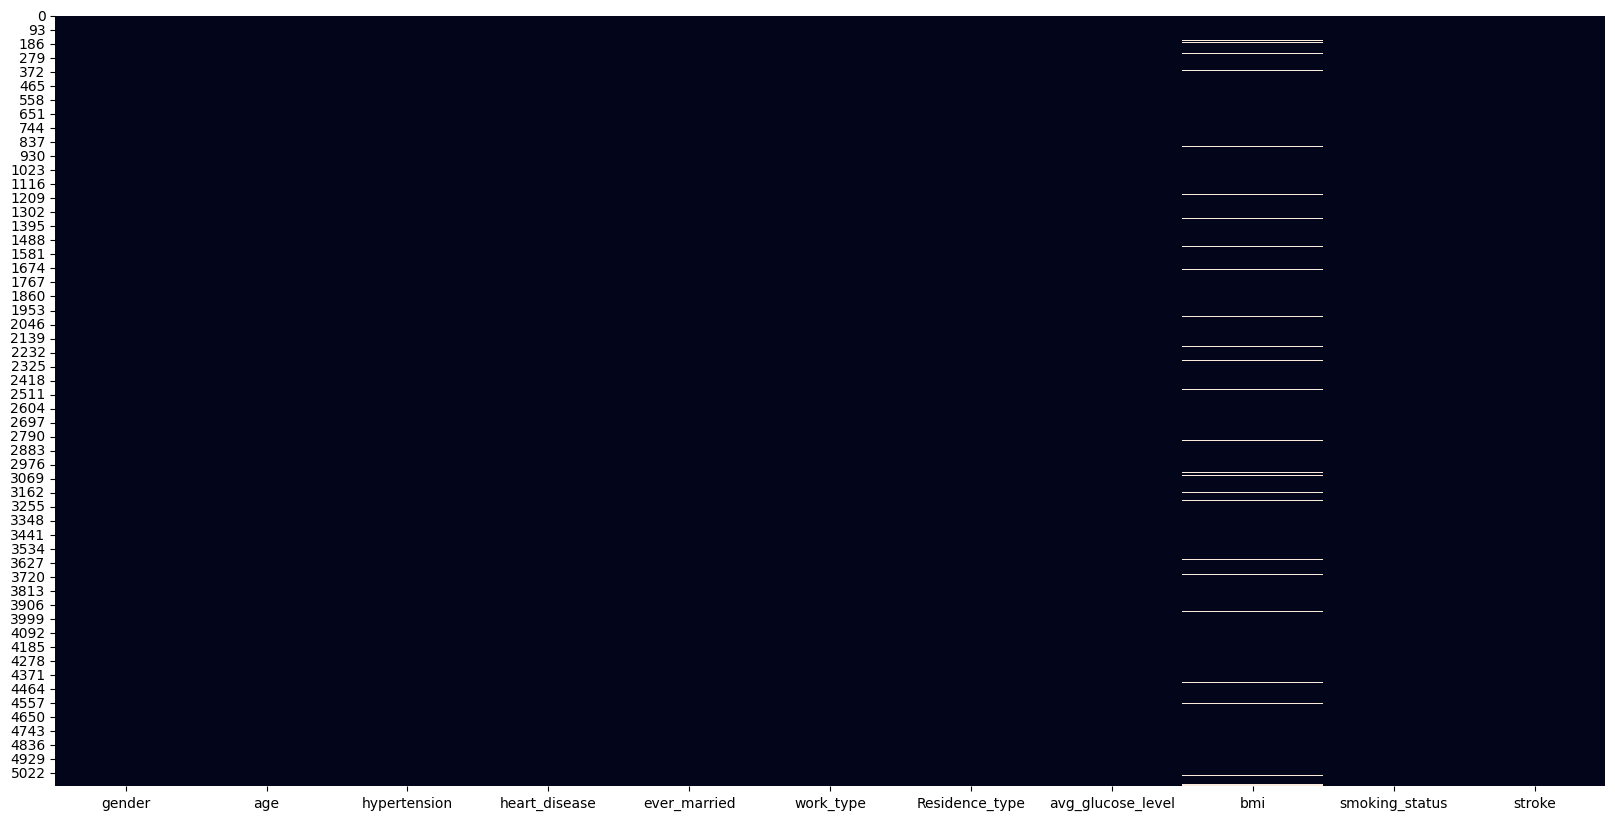

In [171]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [172]:
print(((df.isna().sum()/df.shape[0])*100).sort_values(ascending=True))

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
smoking_status       0.000000
stroke               0.000000
bmi                  3.933464
dtype: float64


#### 1-2 Analyse du Fond

-  **Visualisation de la variable cible**:
    - Seulement 4.87% sont positifs à l'AVC


- **Signification des variables** :
  - Variables continues (float et int) :

    - **Âge (`age`)** : La distribution est bimodale, avec des pics autour de 50 ans (adultes d'âge moyen).
    - **Niveau moyen de glucose (`avg_glucose_level`)** : La distribution est asymétrique vers la droite avec un pic autour de 100 mg/dL et une autre petite bosse autour de 200 mg/dL, indiquant la présence possible de sous-groupes de patients avec des niveaux de glucose plus élevés, potentiellement liés au diabète.

    - **Indice de masse corporelle (`bmi`)** : La distribution est normale, mais tout petit peu asymétrique vers la droite, avec un pic autour de 25-30, correspondant à la gamme de surpoids, et une petite queue droite indiquant des IMC très élevés chez certains patients.

    - **Hypertension** :La majorité des patients n'ont pas d'hypertension, mais une minorité significative (près de 10%) est affectée par cette condition. Cela peut être un facteur de risque important à considérer dans la prédiction des AVC.

    - **Maladie cardiaque (`heart_disease`)** : Un pourcentage encore plus faible (5,40%) de patients est atteint de maladies cardiaques par rapport à l'hypertension, mais étant donné que les maladies cardiaques sont un facteur de risque majeur pour les AVC, cette minorité pourrait être très importante.

  - Variables continues (object) :

    - **Genre (`gender`)** : 58,6% des patients sont de sexe féminin.
   
    - **Statut matrimonial (`ever_married`)** : 65,6% des patients sont ou ont été mariés, tandis que 34,4% ne l'ont jamais été. Le mariage peut être lié à certains comportements ou conditions de santé, ce qui pourrait être pertinent pour la prédiction des AVC.

    - **Type de travail (`work_type`)** : La majorité des patients travaillent dans le secteur privé (57,2%), suivis par les travailleurs indépendants (16,0%), les enfants (13,4%), ceux travaillant pour le gouvernement (12,9%), et une petite proportion n'a jamais travaillé (0,4%). Cela montre que la majorité des patients sont actifs professionnellement, ce qui peut avoir un impact sur leur mode de vie et leur santé.

    - **Type de résidence (`Residence_type`)** : Les patients sont presque également répartis entre les zones urbaines (50,8%) et rurales (49,2%). 

    - **Statut de tabagisme (`smoking_status`)** : 37,0% des patients n'ont jamais fumé, 17,3% ont fumé par le passé, 15,4% fument actuellement, et 30,2% ont un statut de tabagisme inconnu. Le tabagisme est un facteur de risque important pour de nombreuses maladies, y compris les AVC. *Le grand pourcentage de statuts inconnus pourrait poser un défi pour l'analyse*.

- **Relation Variables / Target** :

#### Relation entre les variables liées aux mesures corporelles/sanguines et la variable cible(stroke)

1. **Tableau croisé d'`hypertension` par rapport à `stroke`** :
   - **Observations** :
     - Parmi les patients sans hypertension (hypertension = 0), 4429 n'ont pas eu d'AVC et 183 en ont eu.
     - Parmi les patients avec hypertension (hypertension = 1), 432 n'ont pas eu d'AVC et 66 en ont eu.
   - **Interprétation** :
     - Le taux d'AVC est plus élevé chez les patients hypertendus (environ 13,25%) comparé aux patients non hypertendus (environ 3,97%). Cela indique que l'hypertension est un facteur de risque significatif pour les AVC.

2. **Tableau croisé de `heart_disease` par rapport à `stroke`** :
   - **Observations** :
     - Parmi les patients sans maladie cardiaque (heart_disease = 0), 4632 n'ont pas eu d'AVC et 202 en ont eu.
     - Parmi les patients avec maladie cardiaque (heart_disease = 1), 229 n'ont pas eu d'AVC et 47 en ont eu.
   - **Interprétation** :
     - Le taux d'AVC est également plus élevé chez les patients ayant une maladie cardiaque (environ 17,03%) comparé à ceux sans maladie cardiaque (environ 4,18%). Cela renforce l'idée que les maladies cardiaques sont un facteur de risque important pour les AVC.

3. **Distribution de `avg_glucose_level` par statut d'AVC** :
   - **Observations** :
     - Les patients ayant subi un AVC (courbe bleue) présentent une distribution des niveaux de glucose plus étalée, avec une seconde bosse autour de 200 mg/dL, absente chez les patients n'ayant pas subi d'AVC.
     - Les patients sans AVC ont une distribution de glucose concentrée autour de 100 mg/dL.
   - **Interprétation** :
     - Un niveau de glucose élevé semble être associé à un risque accru d'AVC. Les patients ayant des niveaux de glucose très élevés (au-delà de 150 mg/dL) sont plus susceptibles d'avoir subi un AVC.

4. **Distribution de `bmi` par statut d'AVC** :
   - **Observations** :
     - Les distributions de l'IMC (Indice de Masse Corporelle) sont similaires pour les patients avec et sans AVC, mais la courbe pour les patients avec AVC est légèrement déplacée vers la droite, indiquant des IMC plus élevés.
   - **Interprétation** :
     - Bien que la différence ne soit pas aussi marquée que pour le glucose, les patients avec un IMC plus élevé semblent avoir un risque légèrement accru d'AVC.

#### Relation entre les variables démographiques et comportementales et la variable cible(stroke)

1. **Genre (`gender`)** :
   - **Observations** :
     - Parmi les patients sans AVC, 2853 (58,7%) sont des femmes et 2007 (41,2%) sont des hommes, avec un seul patient classé dans la catégorie "Other".
     - Parmi les patients ayant subi un AVC, 141 (56,6%) sont des femmes et 108 (43,4%) sont des hommes.
   - **Interprétation** :
     - Le taux d'AVC est similaire entre les femmes (4,7%) et les hommes (5,1%). Il n'y a donc pas de différence significative entre les genres concernant le taux d'AVC dans cet ensemble de données.

2. **Âge (`age`)** :
   - **Observations** :
     - La distribution montre que plus de la moitié des patients ayant subi un AVC ont 60 ans ou plus, avec un pic autour de 80 ans.
     - Les patients sans AVC sont répartis sur une gamme plus large d'âges, avec une concentration notable autour de 50 ans.
   - **Interprétation** :
     - L'âge est un facteur de risque important pour l'AVC, avec plus de la moitié des cas d'AVC chez les personnes de 60 ans et plus, comparé à seulement 15,3% pour les patients plus jeunes. Les patients âgés sont donc beaucoup plus susceptibles d'avoir un AVC.

3. **Statut matrimonial (`ever_married`)** :
   - **Observations** :
     - Parmi les patients sans AVC, 3133 (64,4%) sont mariés ou ont été mariés, contre 1728 (35,6%) qui ne l'ont jamais été.
     - Parmi les patients ayant subi un AVC, 220 (88,4%) sont mariés ou ont été mariés, contre seulement 29 (11,6%) qui ne l'ont jamais été.
   - **Interprétation** :
     - Le fait d'être marié ou d'avoir été marié est associé à un taux d'AVC plus élevé (6,6%) comparé à ceux qui ne l'ont jamais été (1,6%). Cela pourrait être lié à l'âge, car les personnes mariées ou ayant été mariées sont souvent plus âgées, un facteur de risque important pour les AVC.

4. **Type de travail (`work_type`)** :
   - **Observations** :
     - La majorité des patients travaillent dans le secteur privé, avec 2776 (59,3%) sans AVC et 149 (5,1%) avec AVC.
     - Les autres types de travail ont des répartitions similaires, avec 65 (7,9%) des travailleurs indépendants ayant subi un AVC, et 33 (5,0%) dans le secteur public.
   - **Interprétation** :
     - Le taux d'AVC est relativement uniforme parmi les différents types de travail, avec environ 4,9% des patients ayant subi un AVC dans le secteur privé, 7,9% parmi les travailleurs indépendants, et 5,0% dans le secteur public. Le type de travail ne semble pas être un facteur déterminant majeur pour le risque d'AVC dans cet ensemble de données.

5. **Type de résidence (`Residence_type`)** :
   - **Observations** :
     - La répartition est presque égale entre les patients vivant en zone rurale et urbaine. Parmi les patients sans AVC, 2400 (49,4%) vivent en zone rurale et 2461 (50,6%) en zone urbaine.
     - Parmi les patients ayant subi un AVC, 114 (45,2%) vivent en zone rurale et 135 (54,8%) en zone urbaine.
   - **Interprétation** :
     - Le risque d'AVC est légèrement plus élevé en zone urbaine (5,2%) par rapport à la zone rurale (4,5%), mais cette différence est relativement faible. Le type de résidence ne semble pas être un facteur déterminant significatif pour les AVC dans cet ensemble de données.

6. **Statut de tabagisme (`smoking_status`)** :
   - **Observations** :
     - Le plus grand groupe de patients sans AVC n'a jamais fumé, avec 1802 (36,4%), suivi de ceux ayant un statut de tabagisme inconnu (1497, 30,2%).
     - Parmi les patients ayant subi un AVC, 90 (4,8%) n'ont jamais fumé, tandis que 47 (3,0%) ont un statut de tabagisme inconnu, 70 (7,9%) sont d'anciens fumeurs, et 42 (5,3%) fument actuellement.
   - **Interprétation** :
     - Le tabagisme est associé à un risque accru d'AVC, avec un taux d'AVC de 7,9% chez les anciens fumeurs et de 5,3% chez les fumeurs actuels. Toutefois, les AVC surviennent également chez ceux qui n'ont jamais fumé, ce qui suggère que d'autres facteurs de risque sont également en jeu.

### Conclusion Générale

L'hypertension, les maladies cardiaques, et des niveaux élevés de glucose sont des facteurs de risque majeurs pour les AVC. L'âge est également un facteur déterminant, avec un risque accru chez les personnes âgées. Le statut matrimonial et le tabagisme sont liés à un risque plus élevé, bien que leur impact soit moins prononcé. Tout ceci poura etre confirmé par des testes estatistiques.



In [173]:
print(df["stroke"].value_counts(normalize=True)*100)

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


In [174]:
continuous_var=[var for var in df.columns if df[var].dtype=="float64"]
Categoricals_var=[var for var in df.columns if df[var].dtype=="object"]

print("Les variables continue sont : ", continuous_var)
print("Les variables categorielles sont : ", Categoricals_var)

Les variables continue sont :  ['age', 'avg_glucose_level', 'bmi']
Les variables categorielles sont :  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


##### Variables Quantitatives

C:\Users\gpres\AppData\Local\Temp\ipykernel_9832\2241253632.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)
C:\Users\gpres\AppData\Local\Temp\ipykernel_9832\2241253632.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],kde=True)
C:\Users\gpres\AppData\Local\Temp\ip

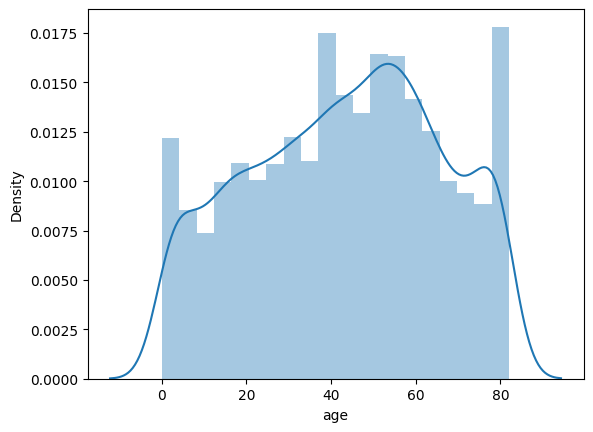

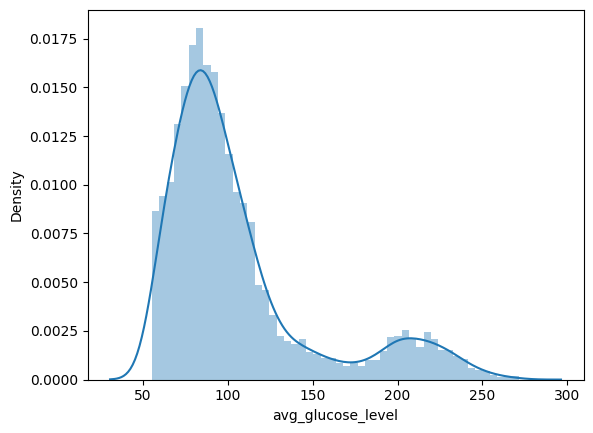

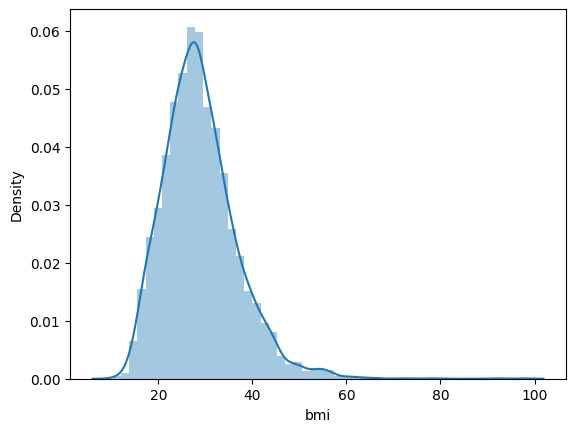

In [175]:
for col in continuous_var:
    plt.figure()
    sns.distplot(df[col],kde=True)

In [176]:
for col in df.select_dtypes('int64').columns:
    if col!="stroke":
        print(f"Distribution en % de la variable {col} : ")
        print(df[col].value_counts(normalize=True)*100)
        print("\n")

Distribution en % de la variable hypertension : 
hypertension
0    90.254403
1     9.745597
Name: proportion, dtype: float64


Distribution en % de la variable heart_disease : 
heart_disease
0    94.598826
1     5.401174
Name: proportion, dtype: float64




##### Variables Qualitatives

In [177]:
for col in Categoricals_var:
    print(f"{col:-<50} {df[col].unique()}")

gender-------------------------------------------- ['Male' 'Female' 'Other']
ever_married-------------------------------------- ['Yes' 'No']
work_type----------------------------------------- ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type------------------------------------ ['Urban' 'Rural']
smoking_status------------------------------------ ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


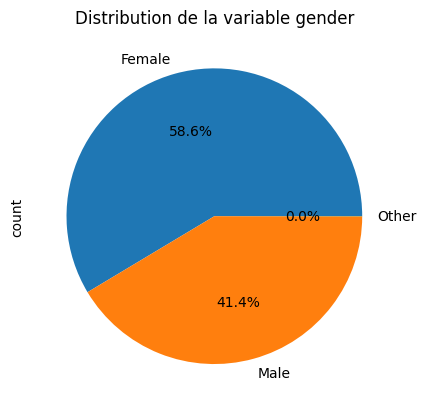

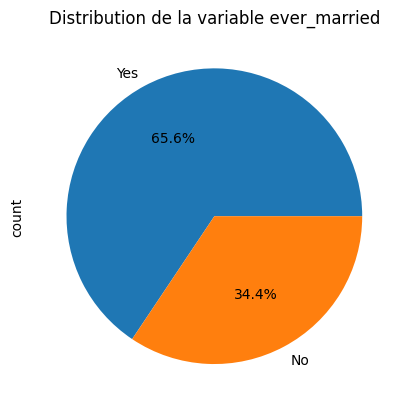

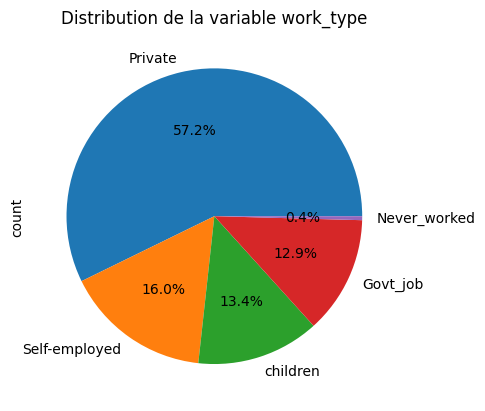

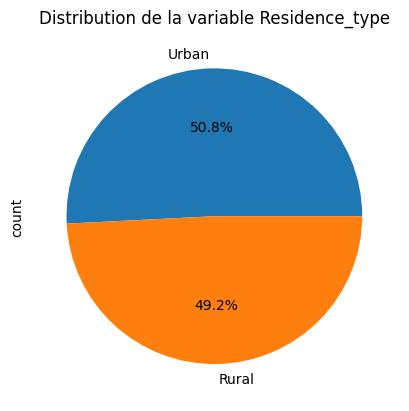

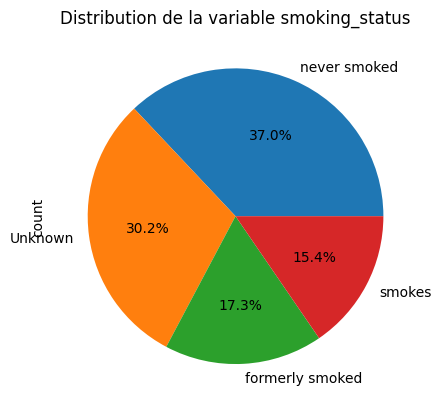

In [178]:
for col in Categoricals_var:
    plt.figure()
    df[col].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f"Distribution de la variable {col}")
    plt.show()
    print("\n")

#### Relation Target / Variables
##### Création de sous-ensembles positifs et négatifs

In [179]:
positive_df=df[df["stroke"]==1]
negative_df=df[df["stroke"]==0]

positive_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


Pour des questions d'exploration nous allons créer deux groupes des variables:
-    **les variables liées aux mesures corporelles/sanguines** et 
-    **les variables démographiques et comportementales**

In [180]:
# Variables liées aux mesures corporelles/sanguines
biomedical_vars = [
    'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'
]

# Variables démographiques et comportementales
demographic_behavioral_vars = [
    'gender', 'age', 'ever_married', 'work_type', 
    'Residence_type', 'smoking_status'
]

##### Relation entre les variables liées aux mesures corporelles/sanguines et la variable cible(stroke)

C:\Users\gpres\AppData\Local\Temp\ipykernel_9832\1441723958.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\gpres\AppData\Local\Temp\ipykernel_9832\1441723958.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\gpres\AppData\Local\Temp\ipykernel_9832\1441723958.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col], label='AVC Pos

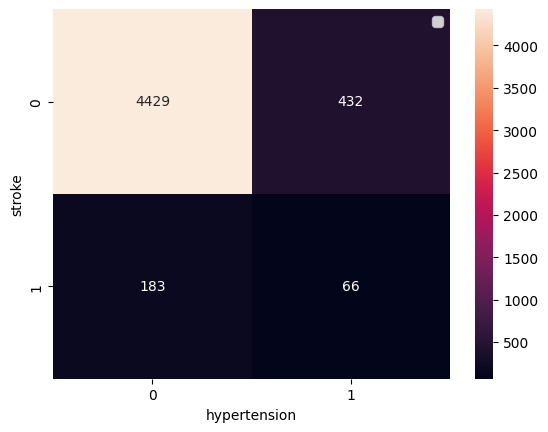

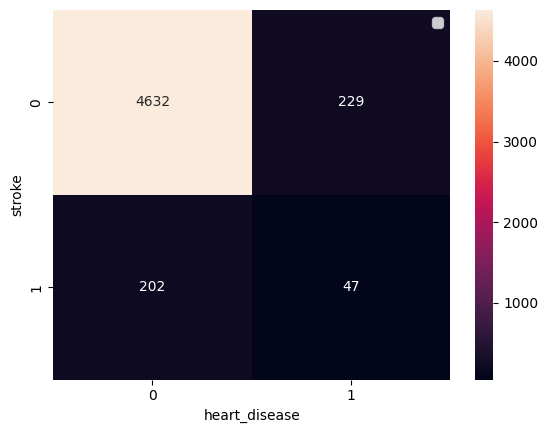

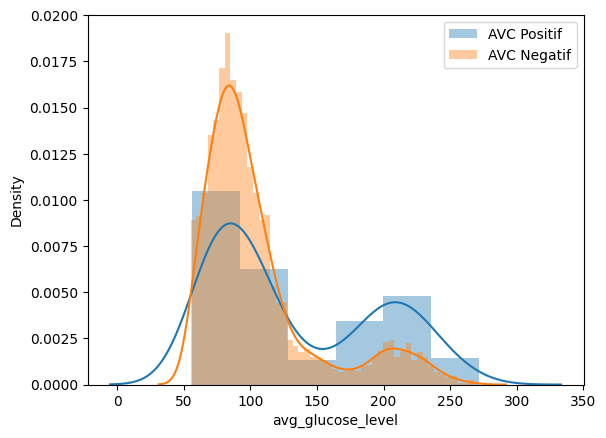

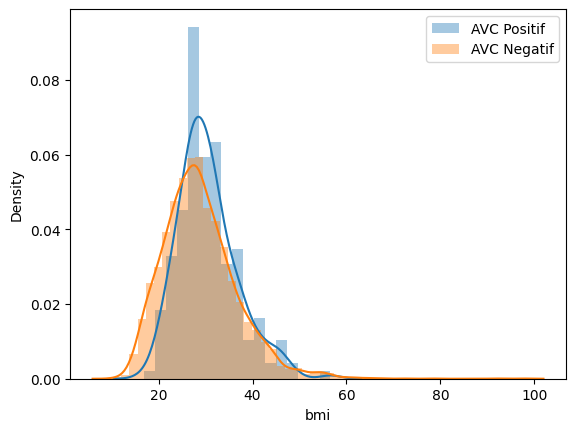

In [181]:
for col in biomedical_vars:
    if df[col].dtype=='float':
        plt.figure()
        sns.distplot(positive_df[col], label='AVC Positif')
        sns.distplot(negative_df[col],label='AVC Negatif')
        plt.legend()
    else:
        plt.figure()
        sns.heatmap(pd.crosstab(df['stroke'],df[col]),annot=True, fmt='d')
        plt.legend()

##### Relation entre les variables démographiques et comportementales et la variable cible(stroke)

C:\Users\gpres\AppData\Local\Temp\ipykernel_9832\124935086.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\gpres\AppData\Local\Temp\ipykernel_9832\124935086.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(positive_df[col],label='AVC Positif')
C:\Users\gpres\AppData\Local\Temp\ipykernel_9832\124935086.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexib

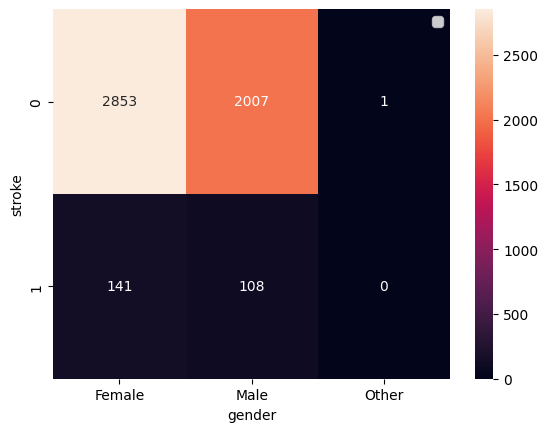

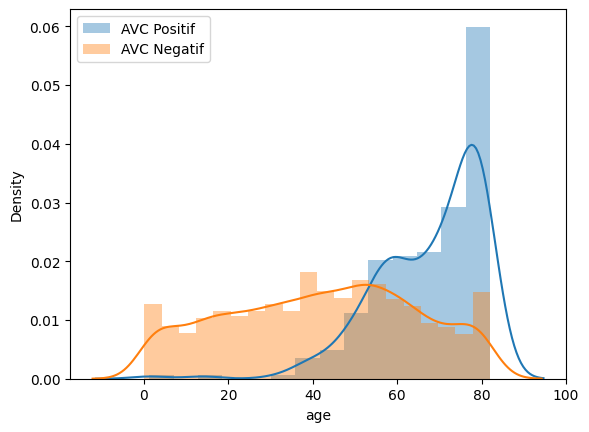

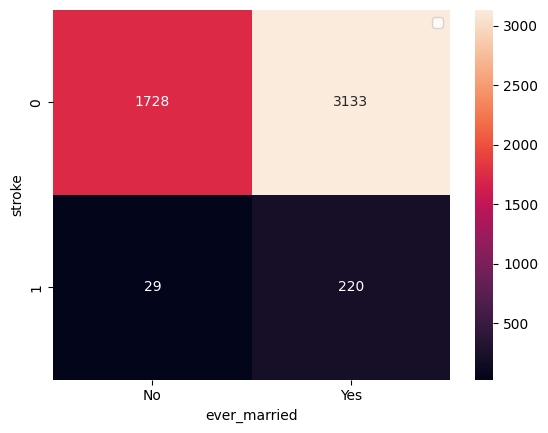

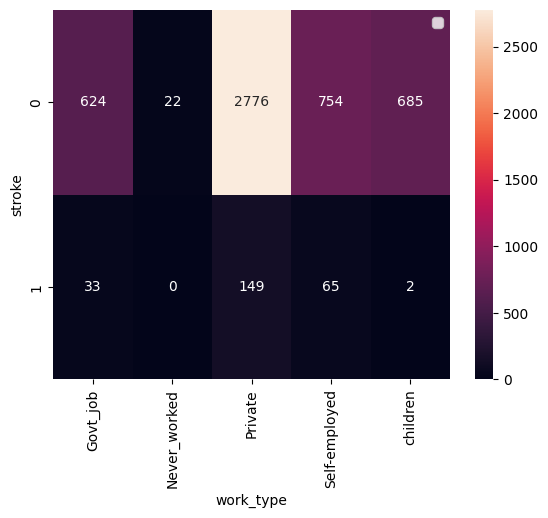

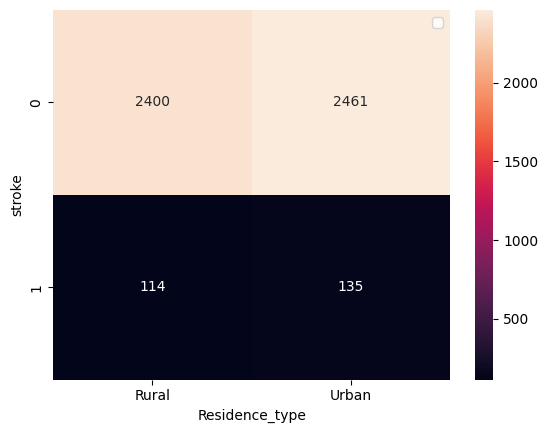

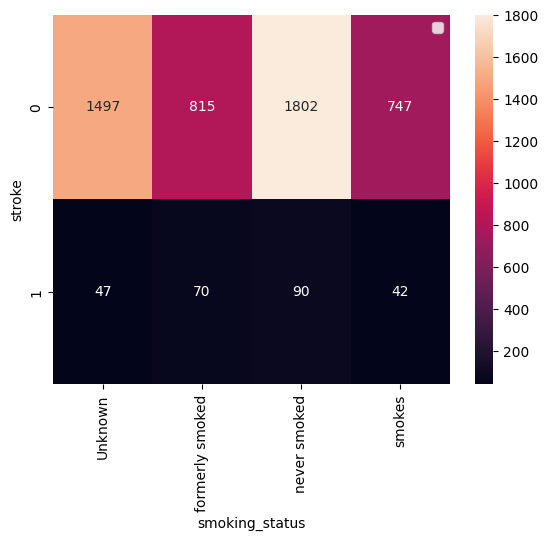

In [182]:
for col in demographic_behavioral_vars:
    if df[col].dtype=='float':
        plt.figure()
        sns.distplot(positive_df[col],label='AVC Positif')
        sns.distplot(negative_df[col],label='AVC Negatif')
        plt.legend()
    else:
        plt.figure()
        sns.heatmap(pd.crosstab(df["stroke"],df[col]),annot=True,fmt='d')
        plt.legend()

### 1-3 Analyse statistique inférentielle


##### 3-1 Test du Chi-carré pour les variables catégorielles

In [183]:
from scipy.stats import chi2_contingency

categorical_vars = ['hypertension', 'heart_disease', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for var in categorical_vars:
    tableau_contingence=pd.crosstab(df[var],df['stroke'])
    chi2,p_value, dof, expected=chi2_contingency(tableau_contingence)

    print(f"Test du Chi-carré pour {var} vs stroke(AVC)")
    print(f"p-value={p_value:.4f}")
    if p_value<0.05:
        print(f"--> Il y a une association significative entre {var} et stroke.\n")
    else:
        print(f"--> Il n'y a pas d'association significative entre {var} et stroke.\n")

Test du Chi-carré pour hypertension vs stroke(AVC)
p-value=0.0000
--> Il y a une association significative entre hypertension et stroke.

Test du Chi-carré pour heart_disease vs stroke(AVC)
p-value=0.0000
--> Il y a une association significative entre heart_disease et stroke.

Test du Chi-carré pour gender vs stroke(AVC)
p-value=0.7895
--> Il n'y a pas d'association significative entre gender et stroke.

Test du Chi-carré pour ever_married vs stroke(AVC)
p-value=0.0000
--> Il y a une association significative entre ever_married et stroke.

Test du Chi-carré pour work_type vs stroke(AVC)
p-value=0.0000
--> Il y a une association significative entre work_type et stroke.

Test du Chi-carré pour Residence_type vs stroke(AVC)
p-value=0.2983
--> Il n'y a pas d'association significative entre Residence_type et stroke.

Test du Chi-carré pour smoking_status vs stroke(AVC)
p-value=0.0000
--> Il y a une association significative entre smoking_status et stroke.



##### 3-2 Test t de Student ou Test U de Mann-Whitney pour les variables continues

Nous avons deux groupes à comparer dans AVC, d'ou le choix du test t de Student ou Test U de Mann-Whitney pour les variables continues dependamment si les variables suivent une distrtibution normale ou pas.

In [184]:
from scipy.stats import mannwhitneyu, ttest_ind

# Variables continues à tester contre 'stroke'
continuous_vars = ['age', 'avg_glucose_level', 'bmi']

for var in continuous_vars:

    group1 = df[df['stroke'] == 0][var]  # Groupe sans AVC
    group2 = df[df['stroke'] == 1][var]  # Groupe avec AVC

    if df[var].skew()<1: # Si la distribution est relativement normale
        stat, p_valeur=ttest_ind(group1,group2, equal_var=False)
        test_type="Test t de Student"
    else:
        stat,p_valeur=mannwhitneyu(group1,group2)
        test_type = "Test U de Mann-Whitney"

    print(f"{test_type} pour {var} vs stroke(AVC)")
    print(f"p-valeur={p_valeur:.4f}")
    if p_valeur < 0.05:
        print(f"--> Il y a une différence significative dans les {var} entre les groupes avec et sans AVC.\n")
    else:
        print(f"--> Il n'y a pas de différence significative dans les {var} entre les groupes avec et sans AVC.\n")

Test t de Student pour age vs stroke(AVC)
p-valeur=0.0000
--> Il y a une différence significative dans les age entre les groupes avec et sans AVC.

Test U de Mann-Whitney pour avg_glucose_level vs stroke(AVC)
p-valeur=0.0000
--> Il y a une différence significative dans les avg_glucose_level entre les groupes avec et sans AVC.

Test U de Mann-Whitney pour bmi vs stroke(AVC)
p-valeur=nan
--> Il n'y a pas de différence significative dans les bmi entre les groupes avec et sans AVC.



#### Conclusion

Les tests statistiques confirment que plusieurs facteurs sont significativement associés au risque d'AVC :

- **Facteurs de Risque Significatifs** :
  - **Hypertension** : Les patients hypertendus ont un risque significativement plus élevé d'AVC.
  - **Maladies Cardiaques (`heart_disease`)** : Les maladies cardiaques augmentent significativement le risque d'AVC.
  - **Statut Matrimonial (`ever_married`)** : Être marié ou avoir été marié est associé à un risque accru d'AVC, probablement lié à l'âge.
  - **Type de Travail (`work_type`)** : Certaines professions, notamment dans le secteur privé et indépendant, montrent un risque plus élevé d'AVC.
  - **Statut de Tabagisme (`smoking_status`)** : Le tabagisme est significativement lié à un risque accru d'AVC.
  - **Âge (`age`)** : L'âge avancé est un facteur de risque majeur pour l'AVC.
  - **Niveau de Glucose Moyen (`avg_glucose_level`)** : Des niveaux élevés de glucose sont associés à un risque accru d'AVC.
  - **Indice de Masse Corporelle (`bmi`)** : Les valeurs de `bmi` influence le fait d'avoir l'AVC ou pas. .

- **Facteurs Non Significatifs** :
  - **Genre (`gender`)** : Le risque d'AVC est similaire pour les hommes et les femmes.
  - **Type de Résidence (`Residence_type`)** : Le lieu de résidence (rurale vs urbaine) n'affecte pas significativement le risque d'AVC.

Ces résultats suggèrent que les stratégies de prévention des AVC devraient se concentrer sur la gestion de l'hypertension, des maladies cardiaques, du contrôle du glucose, et sur les groupes à risque en fonction de leur âge, statut matrimonial, type de travail et tabagisme.


## 2- Pre-Processing

### 2-1- TrainTest -Nettoyage - Encodage

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [215]:
other_gender_observation=df[df['gender']=='Other']

df=df[df['gender']!='Other']

In [216]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [298]:
trainset, testset=train_test_split(df, test_size=0.3,random_state=0)

In [299]:
print(trainset["stroke"].value_counts())

stroke
0    3403
1     173
Name: count, dtype: int64


In [300]:
print(testset["stroke"].value_counts())

stroke
0    1457
1      76
Name: count, dtype: int64


In [301]:
def encodage(df):
    for col in categorical_vars:
        df_encoded=pd.get_dummies(df, dtype="int", drop_first=False)
    return df_encoded

In [302]:
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=5)

def imputation(df):
    #df=df.dropna(axis=0)
    #df=df.fillna(-999)
    df[["bmi"]]=imputer.fit_transform(df[["bmi"]])

    df["smoking_status"]=df["smoking_status"].replace('Unknown', 'Non Déclaré')

    return df

In [303]:
df_copie=df.copy()

imputation(df_copie)
df_copie["smoking_status"].value_counts()

smoking_status
never smoked       1892
Non Déclaré        1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [304]:
def preprocessing(df):

    df=imputation(df)
    df=encodage(df)

    X=df.drop("stroke",axis=1)
    y=df["stroke"]

    print(y.value_counts())

    return X,y

In [305]:
X_train,y_train=preprocessing(trainset)

stroke
0    3403
1     173
Name: count, dtype: int64


In [306]:
X_test,y_test=preprocessing(testset)

stroke
0    1457
1      76
Name: count, dtype: int64


In [307]:
X_test

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Non Déclaré,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
42,82.0,0,1,144.90,26.4,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
380,4.0,0,0,106.22,16.7,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0
1559,53.0,0,0,72.63,66.8,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
352,20.0,0,0,96.57,34.1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
3639,51.0,1,0,85.84,31.8,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,61.0,0,0,99.35,26.1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
663,38.0,0,0,98.73,24.3,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3933,32.0,0,0,101.13,43.9,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0
4413,21.0,0,0,73.81,19.8,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0


### 2-2 Le reechantillonnage avec SMOTE et de la Ponderation des cLasse combinés

In [308]:
#pip install imblearn

In [309]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=12)

# Application de SMOTE sur les données d'entraînement
X_train_resampled, y_train_resampled=smote.fit_resample(X_train,y_train)

# Vérification de la nouvelle répartition des classes
print(pd.Series(y_train_resampled).value_counts(normalize=True)*100)

stroke
0    50.0
1    50.0
Name: proportion, dtype: float64


### 2-3 Modelisation pour le preprocessing

In [310]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [311]:
model_test=RandomForestClassifier(random_state=0)

#### 2-2-1 Procedure d'évaluation

In [312]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve, StratifiedKFold

In [313]:
def evaluation(model):
    
    model.fit(X_train_resampled, y_train_resampled)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train_resampled, y_train_resampled,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[1442   15]
 [  72    4]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1457
           1       0.21      0.05      0.08        76

    accuracy                           0.94      1533
   macro avg       0.58      0.52      0.53      1533
weighted avg       0.92      0.94      0.93      1533



C:\Users\gpres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gpres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gpres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

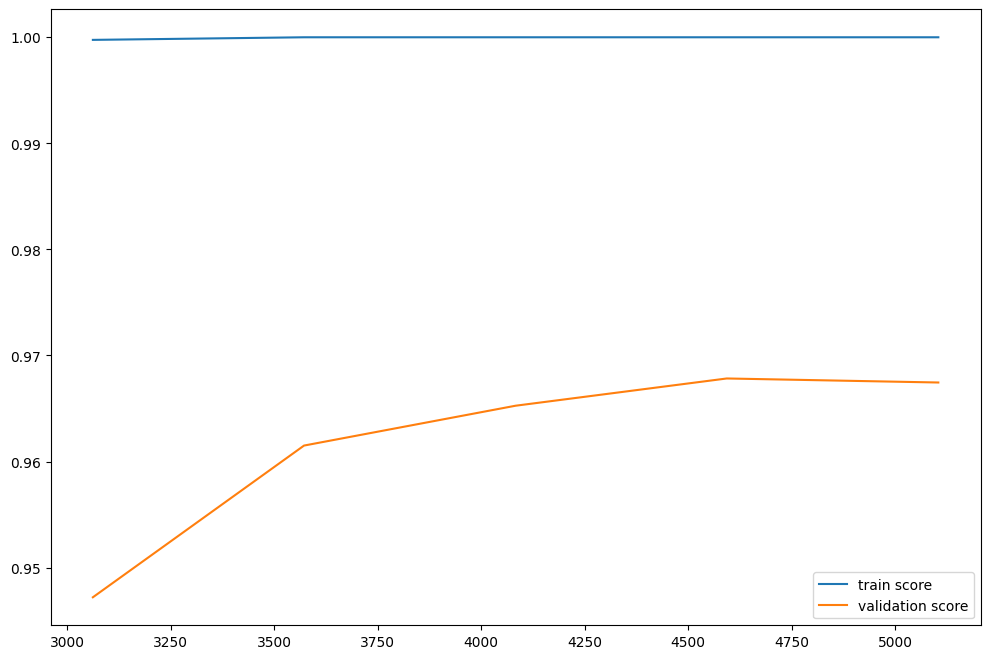

In [314]:
evaluation(model_test)

In [315]:
#pd.DataFrame(model_1.feature_importances_, index=X_train_resampled.columns).plot.bar(figsize=(10,6))

## 3- Modelisation

In [330]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=20))

In [342]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(max_depth=10, min_samples_leaf=10, max_samples=0.9,random_state=0))

C:\Users\gpres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 49  52  67 111 140 154 157 165 166 167 168 176 177 178 182 184 186 187
 195 210 221 222 223 225 226 228] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\gpres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[[1228  229]
 [  39   37]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1457
           1       0.14      0.49      0.22        76

    accuracy                           0.83      1533
   macro avg       0.55      0.66      0.56      1533
weighted avg       0.93      0.83      0.87      1533



C:\Users\gpres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msb = ssbn / float(dfbn)
C:\Users\gpres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\gpres\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gpres\AppData\Local\Packages\PythonSof

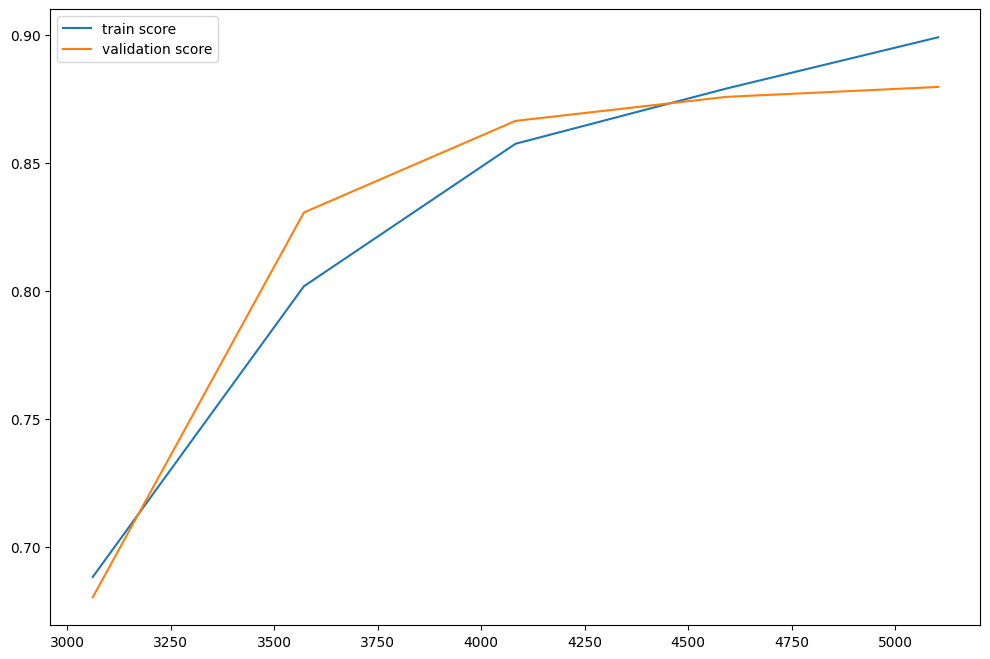

In [343]:
evaluation(RandomForest)